In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using device", device)

using device cuda


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [4]:
train_dataset = datasets.MNIST(
    root=".",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root=".",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.97MB/s]


In [5]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.flatten = nn.Flatten()

        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.layers(x)
        return x
    

In [6]:
model = MNISTClassifier().to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
def train_epoch(model, train_loader, loss_function, optimizer, device):
    model.train()

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        

In [8]:
def evaluate(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    return 100 * correct / total

In [9]:
epochs = 10

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}")
    train_epoch(model, train_loader, loss_function, optimizer, device)
    acc = evaluate(model, test_loader, device)
    print(f"Test Accuracy: {acc:.2f}%")


Epoch 1
Test Accuracy: 96.01%

Epoch 2
Test Accuracy: 96.74%

Epoch 3
Test Accuracy: 97.46%

Epoch 4
Test Accuracy: 97.57%

Epoch 5
Test Accuracy: 97.60%

Epoch 6
Test Accuracy: 97.77%

Epoch 7
Test Accuracy: 97.35%

Epoch 8
Test Accuracy: 97.83%

Epoch 9
Test Accuracy: 97.83%

Epoch 10
Test Accuracy: 98.09%


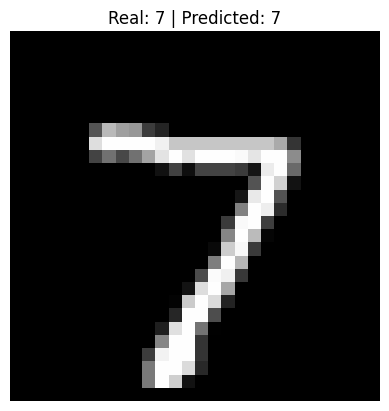

In [10]:
img = 0
image, label = test_dataset[img]

model.eval()

with torch.no_grad():
    image_gpu = image.to(device)
    output = model(image_gpu.unsqueeze(0))
    _, predicted = output.max(1)

plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Real: {label} | Predicted: {predicted.item()}")
plt.axis("off")
plt.show()
